In [5]:
# Loading of relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
np.set_printoptions(threshold=np.inf)
np.random.seed(2500)

In [6]:
def gi(x, mean, sigma):
    inv_S = np.linalg.inv(sigma)
    return -0.5*np.sum(np.dot(x-mean, inv_S)*(x-mean), axis =1)

# Part i

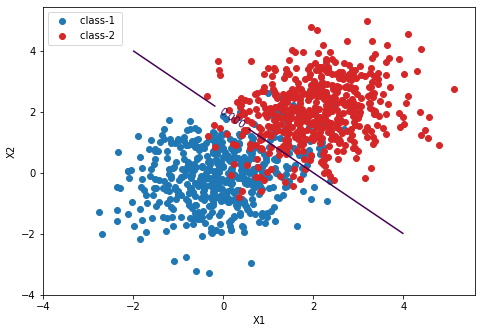

In [7]:
N = 500
Pw1 = Pw2 = 1/2       # prior probabilities of every class is same
m1 = np.array([0, 0])
m2 = np.array([2, 2])

S = np.array([[1, 0.25],
              [0.25, 1]])

X1 = np.random.multivariate_normal(m1, S, N)
X2 = np.random.multivariate_normal(m2, S, N)

nx, ny = (300, 300)
x = np.linspace(-4.0, 4.0, nx)
y = np.linspace(-4.0, 4.0, ny)
xv, yv = np.meshgrid(x, y)
X = np.stack((xv.ravel(), yv.ravel()), axis = 1)
G_case1 = gi(X, m1, S).reshape(xv.shape) - gi(X, m2, S).reshape(xv.shape)
colors = sns.color_palette()

# plotting:
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([1, 1, 1, 1]) 

# Plot on that set of axes
axes.scatter(X1[:,0], X1[:,1], color = colors[0], label = "class-1 ")
axes.scatter(X2[:,0], X2[:,1], color = colors[3], label = "class-2 ")
CS = axes.contour(xv, yv, G_case1, [0])
axes.clabel(CS, inline=True, fontsize=10)
axes.legend(loc=0)
axes.set_xlabel('X1') # Notice the use of set_ to begin methods
axes.set_ylabel('X2')
plt.show()

# Part ii and iii

Bayesian error probabality: 0.088000


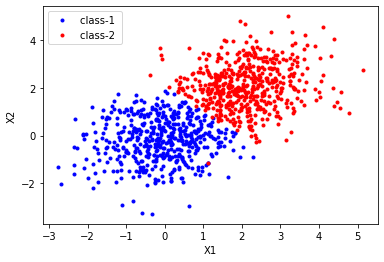

In [11]:
Y1 = 0*np.ones((500, 1))  
Y2 = 1*np.ones((500, 1)) 

Xtest = np.concatenate((X1, X2), axis = 0)
Ytest = np.concatenate((Y1, Y2), axis = 0)

db_1 = Pw1*multivariate_normal.pdf(Xtest, m1 , S)
db_2 = Pw2*multivariate_normal.pdf(Xtest, m2 , S)
db_matrix = np.stack((db_1, db_2), axis = 1)

Bayes_result = np.argmax(db_matrix, axis = 1)
Bayes_error_probability = 1-np.sum(Bayes_result  == Ytest.flatten())/(N*2)
print('Bayesian error probabality: %f' % Bayes_error_probability)
np.nonzero(Bayes_result == 0)

Xtest=Xtest.T
Ytest=Ytest.T

plt.plot(Xtest[0, np.nonzero(Bayes_result == 0)], Xtest[1, np.nonzero(Bayes_result == 0)], '.b')
plt.plot(Xtest[0, np.nonzero(Bayes_result == 1)], Xtest[1, np.nonzero(Bayes_result == 1)], '.r')
plt.plot(Xtest[0, np.nonzero(Bayes_result[1] == 0)], Xtest[1, np.nonzero(Bayes_result[1] == 0)], '.b', label = "class-1 ")
plt.plot(Xtest[0, np.nonzero(Bayes_result[300] == 1)], Xtest[1, np.nonzero(Bayes_result[300] == 1)], '.r', label = "class-2 ")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc=0)
plt.show()

# Part iv and v

In [9]:
# Definition of the loss matrix
L = np.array([[0   , 1], 
              [.005, 0]])


# Classification of the data points
classes_loss = np.zeros(N*2)

for i in range(0, N*2):
    if L[0][1] *  db_1[i] > L[1][0] * db_2[i]: # adding weights to posteriors w.r.t loss function
         classes_loss[i] = 0
    else:
         classes_loss[i] = 1

Error probability estimation
Avg_risk = 0  # Average risk

for i in range(0, N*2):  
    if classes_loss[i] != Yte[0][i]:
        if Yte[0][i] == 1:
                Avg_risk = Avg_risk + L[0, 1]
        else:
                Avg_risk = Avg_risk + L[1, 0]
Avg_risk/= (N*2)
print('Average risk: %f' % Avg_risk)

Average risk: 0.390000


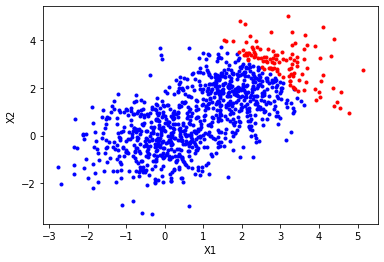

In [10]:
 # Plot the data set
plt.figure(3)
plt.plot(Xte[0, np.nonzero(classes_loss == 0)], Xte[1, np.nonzero(classes_loss == 0)], '.b')
plt.plot(Xte[0, np.nonzero(classes_loss == 1)], Xte[1, np.nonzero(classes_loss == 1)], '.r')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Comments

***1. More points are classified as class 2 because it has higher loss hence the average risk is minimized, it is similar to the example that ML algorithm should classify any indication of cancer as cancerous otherwise it can result in loss of life, later on if it turns out wrong then the loss will be lesser (mental shock).***